[Kaggle Signature Dataset](https://www.kaggle.com/robinreni/signature-verification-dataset)

# Code for generating noisy signature images

In [1]:
def add_random_straight_lines(image,height, width):
    ''' Add random straight lines to the image '''
    num_lines = np.random.randint(1, 5) # number of lines to be added
    y0 = int(height/num_lines) # gap/width between each lines
    for i in range(num_lines):
        line_thickness = np.random.randint(1, 5)
        x1, x2 = 0, width # starting and ending x coordinates
        y = y0*(i+1) + np.random.randint(-0.05*height, 0.05*height) # y coordinate of line
        image = cv2.line(image, (x1, y), (x2, y), (0, 0, 0), thickness=line_thickness) #draw line
        prev_y = y
    return image

In [2]:
def add_random_text(image, height, width):
    ''' Add random texts to the image '''
    closings = ['Sincerly', 'Regards', 'Yours truly', 'Best regards', 'Cordially']
    bottom_text = ['Amal Joseph', 'Steve Jobs', 'Larry Page', 'Paul Walker', 'Raja Ravi Varma', 'Katie Bouman', 'Ada Loveless']

    font = [cv2.FONT_HERSHEY_DUPLEX, cv2.FONT_HERSHEY_COMPLEX, cv2.FONT_HERSHEY_TRIPLEX, cv2.FONT_HERSHEY_COMPLEX_SMALL]
    y = np.random.randint(0.75*height, 1.02*height)
    x = np.random.randint(0.0005*width, 0.3*width)
    fontScale = np.random.random() + 0.7
    thickness = np.random.randint(1, 3)
    image = cv2.putText(image, np.random.choice(bottom_text), (x, y), np.random.choice(font), fontScale, (0, 0, 0), thickness, cv2.LINE_AA)
    return image


In [3]:
def add_random_text_chinese(image, height, width, font_path):
    ''' Add random Chinese texts to the image '''
    bottom_text = ['数学很糟糕', '苹果数学', '女王的', '工程', '紫色的', '铁环', '平均绩点']

    # Load a font that supports Chinese characters
    font_size = np.random.randint(24, 48)  # Adjust font size as needed
    font = ImageFont.truetype(font_path, font_size)

    y = np.random.randint(0.75*height, height - font_size)  # Adjust y to ensure text fits
    x = np.random.randint(0, int(0.3*width))

    # Convert OpenCV image to PIL image
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    draw = ImageDraw.Draw(image_pil)
    
    # Draw the text
    draw.text((x, y), np.random.choice(bottom_text), font=font, fill=(0, 0, 0))

    # Convert back to OpenCV image
    image = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)
    
    return image

In [5]:
def process_image(image_path):    
    ''' Add random straight lines and texts to the image '''
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    image = add_random_text(image, height, width)
    image = add_random_straight_lines(image, height, width)
    return image

In [14]:
def process_image_chinese(image_path):    
    ''' Add random straight lines and texts to the image '''
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    path = '/home/user4/Documents/CycleGAN/pytorch-CycleGAN-and-pix2pix/Fonts/Chinese/NotoSansSC-VariableFont_wght.ttf'
    image = add_random_text_chinese(image, height, width,path)
    image = add_random_straight_lines(image, height, width)
    return image

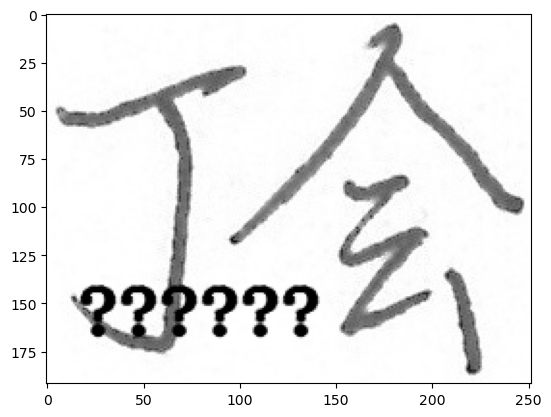

In [6]:
# usage example
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import ImageFont, ImageDraw, Image

currentdir = os.getcwd()
imagepath = os.path.join(currentdir, "chinesesig/丁会-7-1.jpg")
image = process_image_chinese(imagepath)
plt.imshow(image)

# Convert Dataset to CycleGAN Folder Structure  
CycleGAN perform image (domainA) to image (domainB) translation. Train and test images of domainA (clean signatures) must be stored in folders trainA and testA respectively. Similarily, the images in domainB (noisy) should be stored in trainB and testB  
  
Note: I moved all the signatures (from all the subfolders in train and test directory) in Kaggle dataset into one single directory, and the following operations are performed on the resultant folder which contains all the signatures.  
Used only the real signatures from the dataset.

In [15]:
import shutil
import os
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

# move images from sub directories to another folder
currentdir = os.getcwd()
root_path = os.path.join(currentdir, "chinesesig")

for root, dirs, files in os.walk(root_path):
    for filename in files:
        shutil.move(os.path.join(root, filename), os.path.join(currentdir,'datasets/chinesedata3/A/'))

In [16]:
# apply image augumentations and save them
root_path = os.path.join(currentdir,'datasets/chinesedata3/A/')
for root, dirs, files in os.walk(root_path):
    for filename in files:
        image = process_image_chinese(os.path.join(root, filename))
        cv2.imwrite(os.path.join(currentdir, 'datasets', 'chinesedata3', 'B', filename), image)
#         shutil.move(os.path.join(root, filename), 'gan-sign_data_kaggle/images/')

In [17]:
# splitting into train and test
root = os.path.join(currentdir,'datasets/chinesedata3')
srcA_path = os.path.join(currentdir,'datasets/chinesedata3/A/')
srcB_path = os.path.join(currentdir,'datasets/chinesedata3/B/')

trainA_path = os.path.join(currentdir,'datasets/chinesedata3/trainA/')
testA_path = os.path.join(currentdir,'datasets/chinesedata3/testA/')


trainB_path = os.path.join(currentdir,'datasets/chinesedata3/trainB/')
testB_path = os.path.join(currentdir,'datasets/chinesedata3/testB/')

In [18]:
def split_data(src_path, train_path, test_path, split_ratio):
    files = np.array(os.listdir(src_path))
    np.random.shuffle(files)
    split_index = int(split_ratio * len(files))
    testA = files[0:split_index]
    trainA = files[split_index:]
    [shutil.move(os.path.join(src_path, path), os.path.join(train_path, path)) for path in trainA]
    [shutil.move(os.path.join(src_path, path), os.path.join(test_path, path)) for path in testA]

split_data(srcA_path, trainA_path, testA_path, 0.1)
split_data(srcB_path, trainB_path, testB_path, 0.1)

In [19]:
os.rmdir(srcA_path)
os.rmdir(srcB_path)

# Transforming images to CycleGAN input format
CycleGAN requires images of same shape, so I decided to train it with 512x512 images with signature at the center and black (transparent) strips at top and bottom.

In [20]:
# to find the maximum width and height present in the images
from PIL import Image
import os, sys
size_images = dict()

for dirpath, _, filenames in os.walk(trainA_path):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, height = img.size
            size_images[path_image] = {'width': width, 'height': height}
print(size_images)

{'万恨荷-90-5.jpg': {'width': 329, 'height': 166}, '何喆-5-5.jpg': {'width': 307, 'height': 180}, '丁会-7-1.jpg': {'width': 252, 'height': 192}, '于英喆-92-4.jpg': {'width': 424, 'height': 232}, '乔兴学-93-3.jpg': {'width': 369, 'height': 196}, '丁会-38-4.jpg': {'width': 254, 'height': 236}, '任勤-63-2.jpg': {'width': 351, 'height': 248}, '丁勇军-32-3.jpg': {'width': 412, 'height': 205}, '任澉-61-5.jpg': {'width': 362, 'height': 158}}


In [13]:
import os
from PIL import Image
im_size = 512
def make_square(image, min_size=512, fill_color=(255, 255, 255, 0)):
    ''' Resize image as a square with signature in the center and black(transparent) strips at top and bottom. '''
    x, y = image.size
    size = max(min_size, x, y)
    new_im = Image.new('RGB', (size, size), fill_color)
    new_im.paste(image, (int((size - x) / 2), int((size - y) / 2)))
    new_im = new_im.resize((im_size, im_size))
    return new_im

def resize_images(path):
    ''' Function to resize the images to the ip format for gans. '''
    dirs = os.listdir(path)
    for item in dirs:
        if os.path.isfile(path+item):
            image = Image.open(path+item)
            image = make_square(image)
            image.save(path+item)

resize_images(trainA_path)
resize_images(trainB_path)
resize_images(testA_path)
resize_images(testB_path)